In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.spatial.distance import correlation
from sympy.core.multidimensional import structure_copy
from ydata_profiling import ProfileReport
from ydata_profiling.visualisation.plot import correlation_matrix
%matplotlib inline

# Set color palette
sns.set_palette("Set2")

#ignore warning
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('data/GlobalWeatherRepository_474.csv')
data.head()


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [2]:
# Summary Statistics
data.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,48136.000000,48136.000000,4.813600e+04,48136.000000,48136.000000,48136.000000,48136.000000,48136.000000,48136.000000,48136.000000,...,48136.000000,48136.000000,48136.000000,48136.000000,48136.000000,48136.00000,48136.000000,48136.000000,48136.000000,48136.000000
mean,19.141921,22.207315,1.726574e+09,23.116848,73.611765,8.291991,13.348710,171.109897,1013.720106,29.934548,...,19.305626,514.869089,62.788559,13.895397,10.503617,23.34532,45.935104,1.643406,2.493830,49.669520
std,24.481677,65.787207,6.237141e+06,9.106434,16.391497,9.922008,15.966715,103.205451,7.065860,0.208549,...,17.649035,995.345120,37.873132,25.630161,52.069396,45.75442,139.836922,0.956302,2.456689,35.120742
min,-41.300000,-175.200000,1.715849e+09,-24.800000,-12.600000,2.200000,3.600000,1.000000,971.000000,28.670000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.18500,0.185000,1.000000,1.000000,0.000000
25%,3.750000,-6.250000,1.721134e+09,18.300000,64.900000,4.000000,6.500000,83.000000,1010.000000,29.830000,...,10.800000,217.000000,37.000000,0.800000,0.700000,4.62500,7.600000,1.000000,1.000000,15.000000
50%,17.250000,23.320000,1.726655e+09,25.300000,77.500000,6.900000,11.200000,164.000000,1013.000000,29.910000,...,17.000000,309.139000,59.000000,2.960000,2.035000,11.84000,18.500000,1.000000,1.000000,50.000000
75%,40.400000,50.580000,1.732006e+09,29.000000,84.200000,11.600000,18.700000,259.000000,1017.000000,30.030000,...,25.800000,474.000000,83.700000,14.060000,7.770000,26.08500,41.776000,2.000000,3.000000,84.000000
max,64.150000,179.220000,1.737284e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,1080.000000,31.890000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.10000,5858.020000,6.000000,10.000000,100.000000


In [3]:
# dataset structure
print(f'Dataset info: {data.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48136 entries, 0 to 48135
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       48136 non-null  object 
 1   location_name                 48136 non-null  object 
 2   latitude                      48136 non-null  float64
 3   longitude                     48136 non-null  float64
 4   timezone                      48136 non-null  object 
 5   last_updated_epoch            48136 non-null  int64  
 6   last_updated                  48136 non-null  object 
 7   temperature_celsius           48136 non-null  float64
 8   temperature_fahrenheit        48136 non-null  float64
 9   condition_text                48136 non-null  object 
 10  wind_mph                      48136 non-null  float64
 11  wind_kph                      48136 non-null  float64
 12  wind_degree                   48136 non-null  int64  
 13  w

In [4]:
# Check the number of numeric and categorical columns count
numeric_columns_count = data.select_dtypes(include='number').shape[1]

# Count categorical columns
categorical_columns_count =data.select_dtypes(include='object').shape[1]

# Display the counts
print(f'Number of numeric columns: {numeric_columns_count}')
print(f'Number of categorical columns: {categorical_columns_count}')

# Check the shape of the datase
print(f'shape of the Dataset is {data.shape}')


Number of numeric columns: 30
Number of categorical columns: 11
shape of the Dataset is (48136, 41)


In [5]:
# # It is too big to show in the github
# data.profile_report()

# Step 1 Data Cleaning and Preprocessing

In [6]:
# Check for NaN values in the Dataset
missing_value = data.isnull().sum()
print(f'Missing values: {missing_value}')

missing_values = data.isnull().sum().sum()



# Check if there are any missing values and print the result using an f-string
if missing_values > 0:
    print(f"Missing values are present. Total missing values: {missing_values}")
else:
    print("No missing values in the dataset.")

Missing values: country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               

In [7]:
# Check the Duplicates
duplicates_count = data.duplicated().sum()

# Check if there are any duplicate rows and print the result using f-strings
if data.duplicated().any():
    print(f"Duplicate entries found. Total duplicate rows: {duplicates_count}")
else:
    print("No duplicate entries in the dataset.")

No duplicate entries in the dataset.


In [8]:
# Standardize Country Names and Displaying Unique values

# Check Unique Country Names
unique_countries = data['country'].unique()
numOfUniqueCountries = data['country'].nunique()
print(f'Number of Uniquer countries', numOfUniqueCountries)
print(unique_countries)


Number of Uniquer countries 210
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Madagascar' 'Cape Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Comoros' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Swaziland' 'Ethiopia' 'Fiji Islands' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Vatican City'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' '

In [9]:
# Strip leading/trailing spaces and capitalize correctly
data['country'] = data['country'].str.strip().str.title()

country_mapping = {
    'USA United States of America': 'United States of America',
    "Lao People's Democratic Republic": 'Laos',
    'Malásia': 'Malaysia',
    'Komoren': 'Comoros',
    'كولومبيا': 'Colombia',
    'Estonie': 'Estonia',
    'Гватемала': 'Guatemala',
    'Inde': 'India',
    'Letonia': 'Latvia',
    'Польша': 'Poland',
    'Mexique': 'Mexico',
    'Polônia': 'Poland',
    'Marrocos': 'Morocco',
    'Турция': 'Turkey',
    'Saint-Vincent-et-les-Grenadines': 'Saint Vincent and the Grenadines',
    'Saudi Arabien': 'Saudi Arabia',
    'Südkorea': 'South Korea',
    'Bélgica': 'Belgium',
    'Turkménistan': 'Turkmenistan',
    '火鸡': 'Turkey',
    'Jemen': 'Yemen'
}

# Apply the mapping
data['country'] = data['country'].replace(country_mapping)


In [10]:
# Check Unique Country Names
unique_countries = data['country'].unique()
numOfUniqueCountries = data['country'].nunique()
print(f'Number of Uniquer countries', numOfUniqueCountries)
print(unique_countries)


Number of Uniquer countries 192
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua And Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia And Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Madagascar' 'Cape Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Comoros' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Democratic Republic Of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Swaziland' 'Ethiopia' 'Fiji Islands' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Vatican City'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' '

# Step 2 Exploratory Data Analysis (EDA)


# 1.　**Perform basic EDA to uncover the trends, correlations, and patterns.**

We aim to identify the key features that contribute to temperature_celsius, precip_mm, humidity, and cloud in order to uncover underlying trends in weather patterns.

In [11]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for celsius
target_corr = numeric_data.corr()['temperature_celsius'].sort_values(ascending=False)
print(target_corr)


temperature_celsius             1.000000
temperature_fahrenheit          0.999996
feels_like_celsius              0.977567
feels_like_fahrenheit           0.977562
uv_index                        0.563106
air_quality_Ozone               0.318050
longitude                       0.102805
visibility_miles                0.096812
visibility_km                   0.093365
gust_kph                        0.073093
gust_mph                        0.073066
wind_mph                        0.058695
wind_kph                        0.058631
air_quality_PM10                0.035262
precip_in                       0.004584
precip_mm                       0.004217
moon_illumination              -0.017979
air_quality_gb-defra-index     -0.042327
wind_degree                    -0.043175
air_quality_us-epa-index       -0.049720
air_quality_Sulphur_dioxide    -0.066123
air_quality_PM2.5              -0.068943
air_quality_Carbon_Monoxide    -0.082129
cloud                          -0.200677
air_quality_Nitr

In [12]:
# Compute the correlation matrix for precip_mm
target_corr = numeric_data.corr()['precip_mm'].sort_values(ascending=False)
print(target_corr)


precip_mm                       1.000000
precip_in                       0.998347
cloud                           0.217244
humidity                        0.184760
longitude                       0.048212
gust_mph                        0.039999
gust_kph                        0.039986
feels_like_celsius              0.034754
feels_like_fahrenheit           0.034752
air_quality_Carbon_Monoxide     0.012738
wind_degree                     0.011559
moon_illumination               0.004887
temperature_fahrenheit          0.004238
temperature_celsius             0.004217
wind_mph                        0.000691
wind_kph                        0.000653
air_quality_Sulphur_dioxide    -0.015887
air_quality_Nitrogen_dioxide   -0.020705
last_updated_epoch             -0.024959
latitude                       -0.036866
air_quality_PM2.5              -0.038675
air_quality_PM10               -0.038948
visibility_km                  -0.050596
air_quality_gb-defra-index     -0.060000
visibility_miles

In [13]:
# Compute the correlation matrix for humidity
target_corr = numeric_data.corr()['humidity'].sort_values(ascending=False)
print(target_corr)


humidity                        1.000000
cloud                           0.561706
precip_mm                       0.184760
precip_in                       0.180284
last_updated_epoch              0.128255
pressure_mb                     0.026372
pressure_in                     0.026098
air_quality_Carbon_Monoxide     0.013670
air_quality_Nitrogen_dioxide    0.013645
moon_illumination               0.011988
gust_mph                       -0.004958
gust_kph                       -0.005002
wind_degree                    -0.044823
air_quality_Sulphur_dioxide    -0.046112
wind_kph                       -0.066413
wind_mph                       -0.066436
latitude                       -0.078899
visibility_km                  -0.089913
air_quality_PM2.5              -0.090024
visibility_miles               -0.108023
air_quality_gb-defra-index     -0.150893
air_quality_us-epa-index       -0.150920
longitude                      -0.162963
air_quality_PM10               -0.166789
feels_like_fahre

In [14]:
# Compute the correlation matrix for cloud
target_corr = numeric_data.corr()['cloud'].sort_values(ascending=False)
print(target_corr)


cloud                           1.000000
humidity                        0.561706
precip_mm                       0.217244
precip_in                       0.210696
last_updated_epoch              0.052782
gust_mph                        0.045043
gust_kph                        0.045029
moon_illumination               0.010776
wind_degree                     0.008070
longitude                       0.007709
wind_kph                        0.007668
wind_mph                        0.007667
air_quality_Carbon_Monoxide    -0.032736
pressure_mb                    -0.043665
pressure_in                    -0.043874
latitude                       -0.045553
visibility_km                  -0.062400
air_quality_Sulphur_dioxide    -0.062507
air_quality_Nitrogen_dioxide   -0.063616
visibility_miles               -0.081616
air_quality_PM2.5              -0.134711
feels_like_fahrenheit          -0.135130
feels_like_celsius             -0.135181
air_quality_PM10               -0.142329
air_quality_gb-d

**Hypothesis:**

Since uv_index and air_quality_Ozone show the most negative correlations with humidity and cloud, and also a mild negative impact on precip_mm, while contributing positively to temperature_celsius, we can propose the following hypotheses:

1. "High UV index is associated with warmer and drier weather."
- This is supported by the strong positive correlation with temperature_celsius and the strong negative correlation with humidity and cloud.2. "Increased ozone levels reduce clud cover and himidity, possibly leaing to clearer skies"

2. "Increased ozone levels reduce cloud cover and humidity, possibly leading to clearer skies."
- This is based on the observed negative correlations between air_quality_Ozone and cloud as well as humidity.

**Data Visualization**
1. Temperature and uv_index

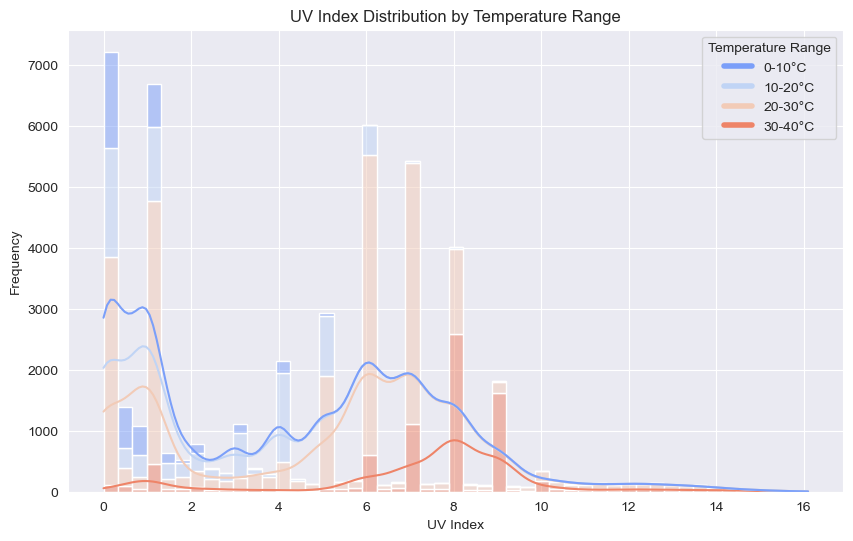

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create bins for temperature ranges
bins = [0, 10, 20, 30, 40]
labels = ['0-10°C', '10-20°C', '20-30°C', '30-40°C']
data['temp_bins'] = pd.cut(data['temperature_celsius'], bins=bins, labels=labels)

# Define the colors for the bins
palette = sns.color_palette('coolwarm', len(labels))

# Plot histogram without automatic legend
# kde, Kernel Density Estimate shows smooth curve
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='uv_index', hue='temp_bins', hue_order=labels, multiple='stack', kde=True, palette=palette)

# Add a manual legend
custom_legend = [plt.Line2D([0], [0], color=color, lw=4) for color in palette]
plt.legend(custom_legend, labels, title='Temperature Range')

# Add title and axis labels
plt.title('UV Index Distribution by Temperature Range')
plt.xlabel('UV Index')
plt.ylabel('Frequency')
plt.show()


Observation:

1. **Low UV Index Across All Temperature Ranges:**
The UV Index values of 0–2 are present in all temperature ranges, including the colder ranges (0–10°C). This suggests that low UV exposure is consistent across the year, regardless of temperature.

2. **Higher UV Index at Warmer Temperatures:**
    The UV Index values above 6 are predominantly seen in the warmer temperature ranges (20–30°C and 30–40°C). This indicates a stronger correlation between higher temperatures and elevated UV exposure, likely due to clearer skies and stronger solar radiation during warmer periods.


2. air_quality_Ozone and humidity

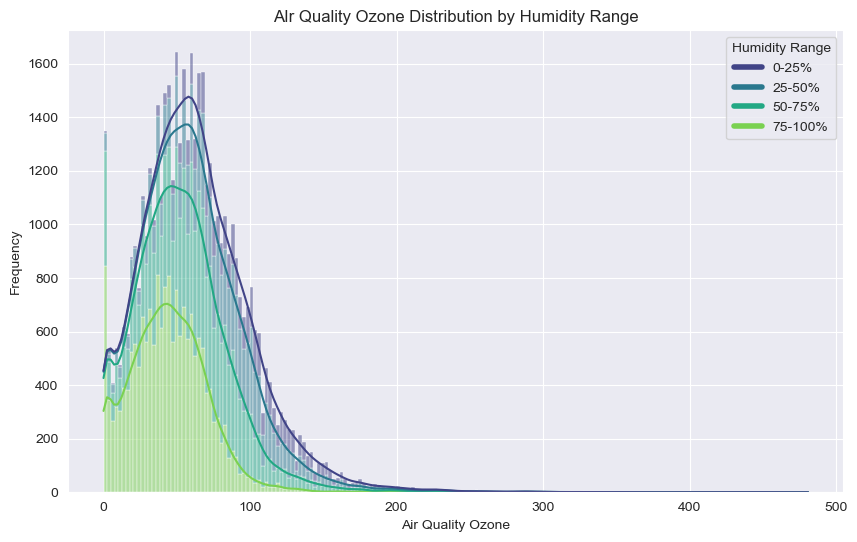

In [16]:
# Define ins and lables for humidity
bins = [0, 25, 50, 75, 100]
labels = ['0-25%', '25-50%', '50-75%', '75-100%']
data['humidity_bins'] = pd.cut(data['humidity'], bins=bins, labels=labels)

# Define the colos for the bins
palette = sns.color_palette('viridis', len(labels))

# Plot histogram without automatic legend
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='air_quality_Ozone', hue='humidity_bins', hue_order=labels, multiple='stack', kde=True, palette=palette)

# Add a manual legend
custom_legend = [plt.Line2D([0],[0], color=color, lw=4) for color in palette]
plt.legend(custom_legend, labels, title='Humidity Range')

# Add title and axis labels
plt.title('AIr Quality Ozone Distribution by Humidity Range')
plt.xlabel('Air Quality Ozone')
plt.ylabel('Frequency')
plt.show()

Observation:

**At Lower ozone Level(<100):**
- The frequencies across humidity ranges are closer together.
- This suggested that lowe ozone levels occur consistently across all humidity ranges.
- Lower ozone levels are more evenly distributed across all humidity ranges.

**At Higher ozone Level(>100):**
- the frequencies show greater variation across humidity ranges
- (75%-100%) has noticeably lower frequencies.
- (0-50%) are more dominant at higher ozone levels.
- Higher ozone concentrations tend to occur in low-humidity environments,

# 2. **Generate visualizations for temperature and precipitation.**

- Individual Visualizations

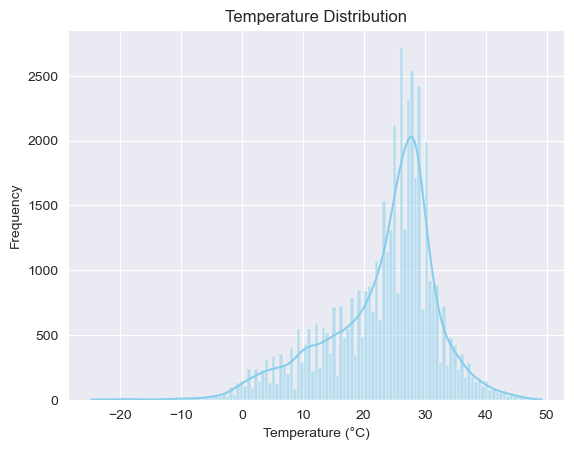

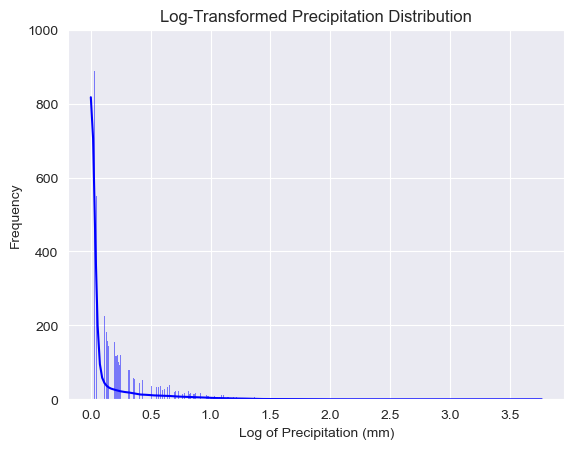

In [17]:
data = pd.read_csv('data/GlobalWeatherRepository_470.csv')


# Temperature Distribution
sns.histplot(data=data, x='temperature_celsius', kde=True, color='skyblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Precipitation Distribution
import numpy as np
data['log_precip_mm'] = np.log1p(data['precip_mm'])  # log1p handles log(0) safely
sns.histplot(data=data, x='log_precip_mm', kde=True, color='blue')
plt.title('Log-Transformed Precipitation Distribution')
plt.xlabel('Log of Precipitation (mm)')
plt.ylabel('Frequency')
plt.ylim(0,1000)
plt.show()


- Relationship Between Temperature and Precipitation

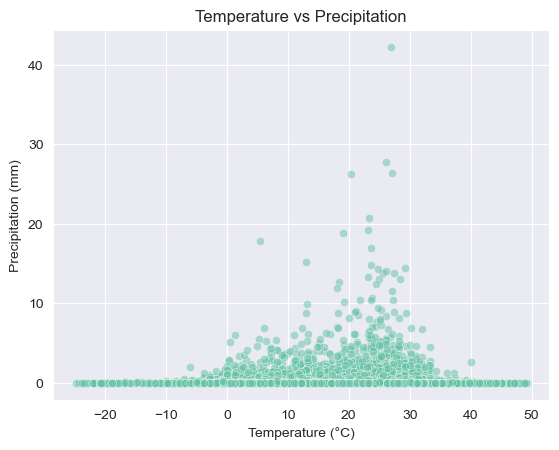

In [18]:
# Scatterplot

sns.scatterplot(data=data, x='temperature_celsius', y='precip_mm', alpha=0.5)
plt.title('Temperature vs Precipitation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.show()

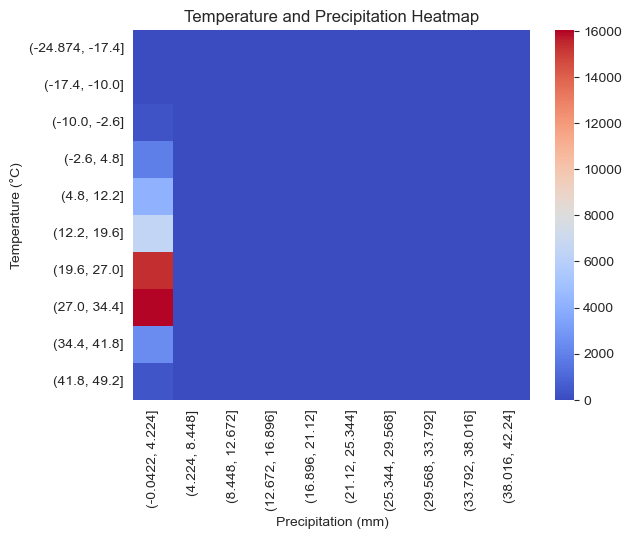

In [19]:
# Heatmap (Binned Visualization)
data['temp_bins'] = pd.cut(data['temperature_celsius'], bins=10)
data['precip_bins'] = pd.cut(data['precip_mm'], bins=10)
heatmap_data = data.groupby(['temp_bins', 'precip_bins']).size().unstack(fill_value=0)

sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Temperature and Precipitation Heatmap')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Temperature (°C)')
plt.show()

Observation:

1. **Temperature Distribution:** The temperature data follows a normal distribution, primarily ranging between 0°C and 40°C, with a peak around 20°C to 30°C. This indicates that most temperatures are in a moderate to warm range, which is expected in many climates.

2. **Precipitation:** The majority of precipitation values are concentrated between 0.0mm and 0.5mm, indicating predominantly dry conditions in this dataset. However, there are some outliers with significantly higher precipitation levels.

3. **Correlation (Scatter Plot):** The scatter plot indicates that higher temperatures may slightly correlate with increased precipitation, but the overall precipitation remains low even at higher temperatures.

4. **Log-Transformed Precipitation:** The log-transformed distribution shows that most of the precipitation data clusters near zero, emphasizing the dry nature of the dataset. The transformation highlights a few extreme precipitation values more clearly.